## 3. Model Training & Evaluation

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier

In [50]:
hd = pd.read_csv(r"C:\Users\muzam\OneDrive\Desktop\Projects\healthcare-risk-modelling\datasets\heart.csv")
hd_df = pd.DataFrame(hd)
hd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### 3.1 Train/Test Split

In [39]:
X = hd_df.drop("target", axis=1)
y = hd_df["target"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.25)

In [41]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((768, 13), (768,), (257, 13), (257,))

#### 3.2 Baseline Models

WE will be using RandomForestClassifier, LogisticRegression & XGBoostClassifier

These models will be trained and evaluated based on the same training & test data set.

In [42]:
clf = RandomForestClassifier()
clf2 = LogisticRegression()
clf_xgb = XGBClassifier(
    learning_rate=0.1,
    max_depth=6,
    eval_metric='logloss'
)

In [43]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
clf2.fit(X_train, y_train)

C:\Users\muzam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### 3.3 Evaluate Models

In [46]:
y_pred = clf.predict_proba(X_test)
y_pred2 = clf2.predict_proba(X_test)
y_pred_xgb = clf_xgb.predict_proba(X_test)

In [47]:
y_pred, y_pred2, y_pred_xgb

(array([[0.88, 0.12],
        [0.05, 0.95],
        [0.  , 1.  ],
        [0.99, 0.01],
        [0.04, 0.96],
        [0.95, 0.05],
        [0.12, 0.88],
        [0.02, 0.98],
        [0.  , 1.  ],
        [0.03, 0.97],
        [1.  , 0.  ],
        [0.25, 0.75],
        [0.95, 0.05],
        [0.96, 0.04],
        [1.  , 0.  ],
        [0.  , 1.  ],
        [0.75, 0.25],
        [0.  , 1.  ],
        [0.92, 0.08],
        [0.03, 0.97],
        [0.  , 1.  ],
        [0.96, 0.04],
        [0.01, 0.99],
        [0.94, 0.06],
        [0.02, 0.98],
        [0.1 , 0.9 ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.95, 0.05],
        [1.  , 0.  ],
        [0.9 , 0.1 ],
        [1.  , 0.  ],
        [0.88, 0.12],
        [0.04, 0.96],
        [0.07, 0.93],
        [0.83, 0.17],
        [0.1 , 0.9 ],
        [0.96, 0.04],
        [0.17, 0.83],
        [0.99, 0.01],
        [0.09, 0.91],
        [0.06, 0.94],
        [0.93, 0.07],
        [0.  , 1.  ],
        [1.  , 0.  ],
        [0

In [51]:
y_pred_labels = np.argmax(y_pred, axis=1)

#### RandomForestClassifier

In [73]:
accuracy = accuracy_score(y_test, y_pred_labels)
cm = confusion_matrix(y_test, y_pred_labels)
cf = classification_report(y_test, y_pred_labels)
cv_acc = np.mean(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))
cv_prec = np.mean(cross_val_score(clf, X, y, cv=5, scoring='precision'))
cv_recall = np.mean(cross_val_score(clf, X, y, cv=5, scoring='recall'))
cv_f1 = np.mean(cross_val_score(clf, X, y, cv=5, scoring='f1'))

In [72]:
print(f"Accuracy: {accuracy}")
print("\n")
print(f"Confusion Matrix: \n {cm}")
print("\n")
print(f"Classification Report: \n {cf}")
print("\n")
print(f"Cross Validated Metrics: \n")
print(f" CV Accuracy: {cv_acc}")
print(f" CV Precision: {cv_prec}")
print(f" CV Recall: {cv_recall}")
print(f" CV F1: {cv_f1}")

Accuracy: 1.0


Confusion Matrix: 
 [[125   0]
 [  0 132]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



Cross Validated Metrics: 

 CV Accuracy: 0.9941463414634146
 CV Precision: 0.9944954128440366
 CV Recall: 1.0
 CV F1: 0.9972093023255815


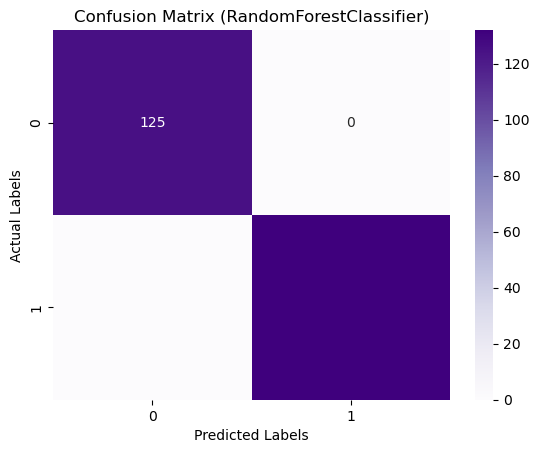

In [74]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Purples"
)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix (RandomForestClassifier)")
plt.show()

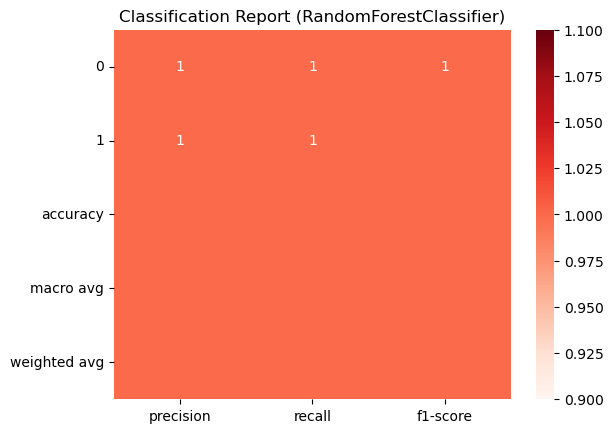

In [75]:
cr = classification_report(y_test, y_pred_labels, output_dict=True)
t = pd.DataFrame(cr).transpose()
sns.heatmap(
    t[['precision', 'recall', 'f1-score']],
    annot=True,
    cmap="Reds"
)
plt.title("Classification Report (RandomForestClassifier)");

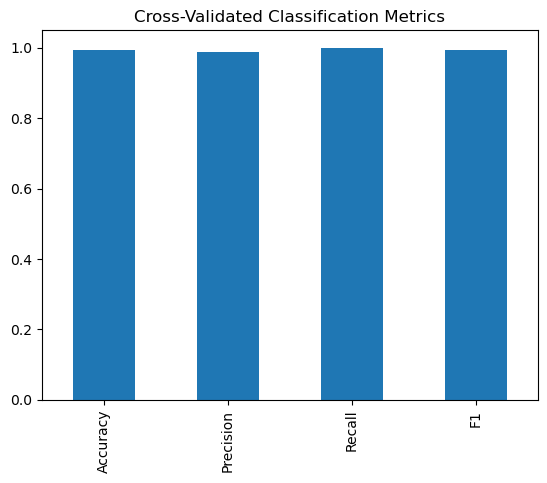

In [99]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_prec,
                          'Recall': cv_recall,
                          'F1': v_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics",
                      legend=False);

### LogisticRegression

In [58]:
y_pred_labels_2 = np.argmax(y_pred2, axis=1)

In [84]:
accuracy = accuracy_score(y_test, y_pred_labels_2)
cm = confusion_matrix(y_test, y_pred_labels_2)
cf = classification_report(y_test, y_pred_labels_2)
cv_acc = np.mean(cross_val_score(clf2, X, y, cv=5, scoring='accuracy'))
cv_prec = np.mean(cross_val_score(clf2, X, y, cv=5, scoring='precision'))
cv_recall = np.mean(cross_val_score(clf2, X, y, cv=5, scoring='recall'))
cv_f1 = np.mean(cross_val_score(clf2, X, y, cv=5, scoring='f1'))

C:\Users\muzam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\muzam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [101]:
print(f"Accuracy: {accuracy}")
print("\n")
print(f"Confusion Matrix: \n {cm}")
print("\n")
print(f"Classification Report: \n {cf}")
print("\n")
print(f"Cross Validated Metrics: \n")
print(f" CV Accuracy: {cv_acc}")
print(f" CV Precision: {cv_prec}")
print(f" CV Recall: {cv_recall}")
print(f" CV F1: {cv_f1}")

Accuracy: 1.0


Confusion Matrix: 
 [[ 94  31]
 [ 12 120]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



Cross Validated Metrics: 

 CV Accuracy: 0.9941463414634146
 CV Precision: 0.9889398572884811
 CV Recall: 1.0
 CV F1: 0.9943924009171307


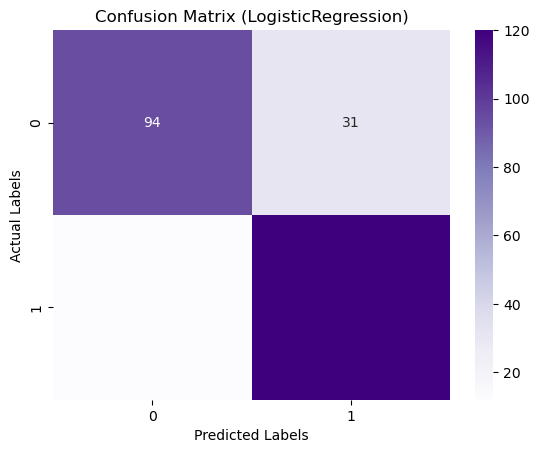

In [102]:
cm = confusion_matrix(y_test, y_pred_labels_2)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Purples"
)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix (LogisticRegression)")
plt.show()

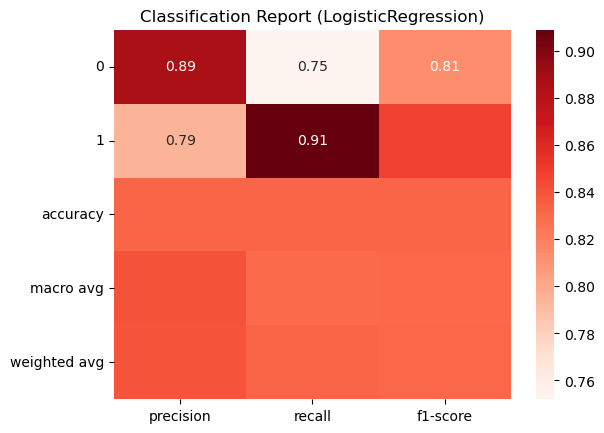

In [103]:
cr = classification_report(y_test, y_pred_labels_2, output_dict=True)
t = pd.DataFrame(cr).transpose()
sns.heatmap(
    t[['precision', 'recall', 'f1-score']],
    annot=True,
    cmap="Reds"
)
plt.title("Classification Report (LogisticRegression)");

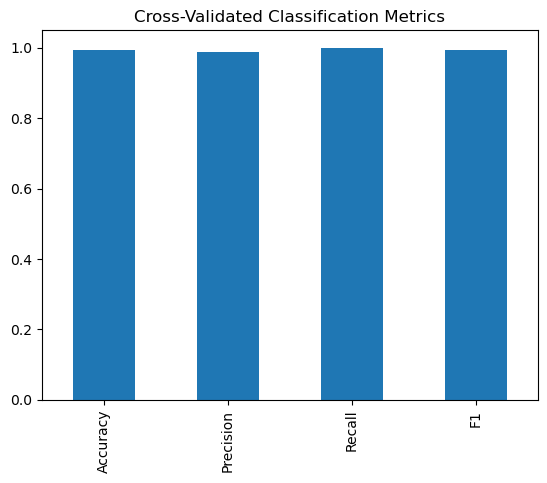

In [105]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_prec,
                          'Recall': cv_recall,
                          'F1': cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics",
                      legend=False);

### XGBClassifier

In [90]:
y_pred_labels_xgb = np.argmax(y_pred_xgb, axis=1)

In [91]:
accuracy = accuracy_score(y_test, y_pred_labels_xgb)
cm = confusion_matrix(y_test, y_pred_labels_xgb)
cf = classification_report(y_test, y_pred_labels_xgb)
cv_acc = np.mean(cross_val_score(clf_xgb, X, y, cv=5, scoring='accuracy'))
cv_prec = np.mean(cross_val_score(clf_xgb, X, y, cv=5, scoring='precision'))
cv_recall = np.mean(cross_val_score(clf_xgb, X, y, cv=5, scoring='recall'))
cv_f1 = np.mean(cross_val_score(clf_xgb, X, y, cv=5, scoring='f1'))

In [92]:
print(f"Accuracy: {accuracy}")
print("\n")
print(f"Confusion Matrix: \n {cm}")
print("\n")
print(f"Classification Report: \n {cf}")
print("\n")
print(f"Cross Validated Metrics: \n")
print(f" CV Accuracy: {cv_acc}")
print(f" CV Precision: {cv_prec}")
print(f" CV Recall: {cv_recall}")
print(f" CV F1: {cv_f1}")

Accuracy: 1.0


Confusion Matrix: 
 [[125   0]
 [  0 132]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



Cross Validated Metrics: 

 CV Accuracy: 0.9941463414634146
 CV Precision: 0.9889398572884811
 CV Recall: 1.0
 CV F1: 0.9943924009171307


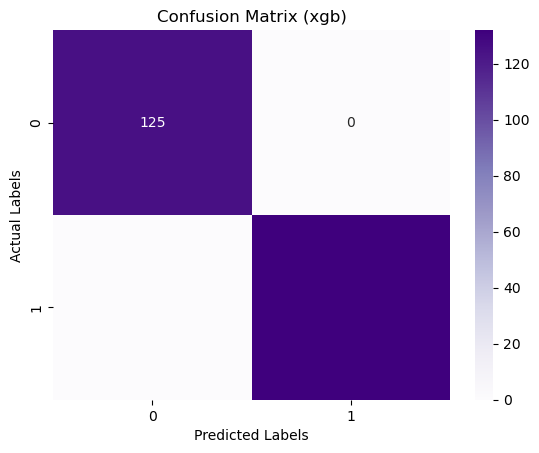

In [93]:
cm = confusion_matrix(y_test, y_pred_labels_xgb)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Purples",
)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix (xgb)")
plt.show()

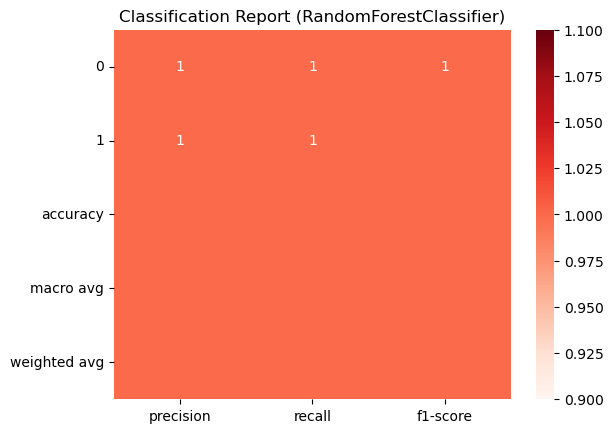

In [94]:
cr = classification_report(y_test, y_pred_labels_xgb, output_dict=True)
t = pd.DataFrame(cr).transpose()
sns.heatmap(
    t[['precision', 'recall', 'f1-score']],
    annot=True,
    cmap="Reds"
)
plt.title("Classification Report (RandomForestClassifier)");

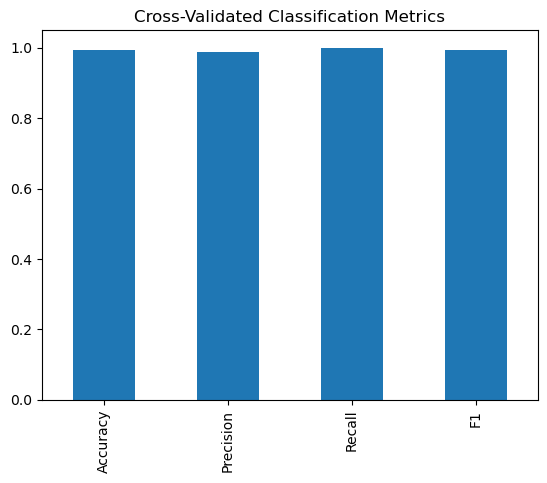

In [106]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_prec,
                          'Recall': cv_recall,
                          'F1': cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics",
                      legend=False);

## Conclusion
#### XGBoost and RandomForestClassifier yield the most accurate results (nearly 100%)
### LogisticRegression lags behind
(makes sense considering the target value is discrete, not continuous)

### IF Evaluation Metric has not been reached, confirm if:
* More data could be collected
* Better ML model can be used
* Current ML models can be improved further

### *Continued in the next Notebook:*

## "Economic Costs & Modelling: Heart Disease"